In [90]:
fitness_dimensions_distribution = {
    "strength": 5,
    "cardio": 9,
    "mobility": 9,
    "agility": 5
}

def normalize_dist(dist):
    total = sum(dist.values())
    for key, value in dist.items():
        dist[key] = value/total
    return dist

noraml_dist = normalize_dist(fitness_dimensions_distribution)

import json
def pretty(dist):
    print(json.dumps(dist, sort_keys=True, indent=4))

In [91]:
import numpy as np

def recommend(noraml_dist):
    probs = list(noraml_dist.values())
    keys = list(noraml_dist.keys())
    choice = np.random.choice(keys, 1, p=probs)[0]
    print(choice)
    return choice

In [92]:
choice_list = []
for i in range(100):
    choice = recommend(noraml_dist)
    choice_list.append(choice)
    
actual_dist = {}
for choice in choice_list:
    if choice in actual_dist:
        actual_dist[choice] += 1
    else:
        actual_dist[choice] = 1
actual_dist = normalize_dist(actual_dist)

pretty(noraml_dist) 
pretty(actual_dist)

{
    "agility": 0.17857142857142858,
    "cardio": 0.32142857142857145,
    "mobility": 0.32142857142857145,
    "strength": 0.17857142857142858
}
{
    "agility": 0.16,
    "cardio": 0.31,
    "mobility": 0.35,
    "strength": 0.18
}


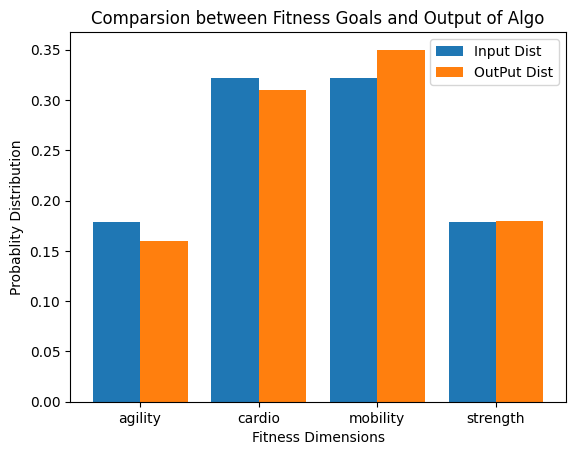

In [109]:
import numpy as np 
import matplotlib.pyplot as plt 
  
keys = list(noraml_dist.keys())
keys = sorted(keys)

input_dist = [noraml_dist[key] for key in keys]
output_dist = [actual_dist[key] for key in keys]

X_axis = np.arange(len(keys))
  
plt.bar(X_axis - 0.2, input_dist, 0.4, label = 'Input Dist')
plt.bar(X_axis + 0.2, output_dist, 0.4, label = 'Output Dist')
  
plt.xticks(X_axis, keys)
plt.xlabel("Fitness Dimensions")
plt.ylabel("Probablity Distribution")
plt.title("Comparsion between Fitness Goals and Output of Algo")
plt.legend()
plt.show()